# Exercício 1 
#### A partir da base de dados propaganda.csv Download propaganda.csvfaça três modelos de regressão simples para comparar as propagandas de TV, rádio e jornal. É imprescindível realizar:

1 – análise descritiva

2 – Calculo de correlação e covariância

3 – Faça o modelo de regressão

4 – realize a analise de resíduos

5 – Análise do Modelo

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats



### 1 – análise descritiva

In [4]:
dados = pd.read_csv('propaganda.csv')

In [5]:
dados.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
dados.shape

(200, 4)

In [8]:
dados.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
dados.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

In [13]:
dados.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

In [14]:
dados.isna().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

A base de dados não possui dados faltantes ou nulos e todos os dados são do mesmo tipo.

### 2 – Calculo de correlação e covariância


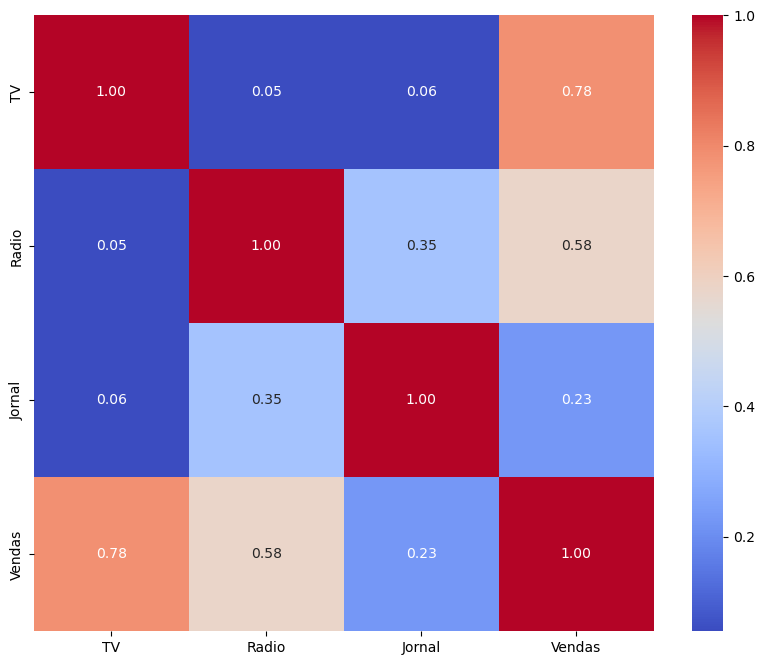

In [17]:
# Calcula a matriz de correlação
corr = dados.corr()

# Usa a função heatmap do Seaborn para criar o mapa de calor
plt.figure(figsize=(10, 8)) # Define o tamanho da figura
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Mostra o gráfico
plt.show()


Podemos ver claramente que a correlacão de Vendas com propagandas em TV é maior que na Radio que é maior que no Jornal

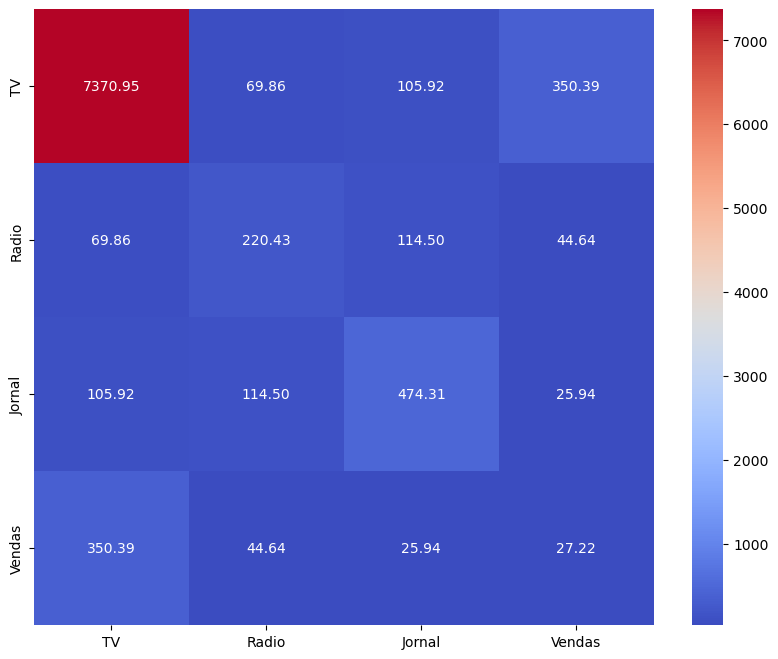

In [20]:
cov = dados.cov()

# Usa a função heatmap do Seaborn para criar o mapa de calor
plt.figure(figsize=(10, 8)) # Define o tamanho da figura
sns.heatmap(cov, annot=True, fmt=".2f", cmap='coolwarm')

# Mostra o gráfico
plt.show()

### 3 – Faça o modelo de regressão

In [83]:

# Definindo a variável dependente (Vendas) e independente (TV)
X = dados['TV']  # Variável independente (TV)
X_radio = dados['Radio']
X_jornal = dados['Jornal']
y = dados['Vendas']  # Variável dependente (Vendas)

# Adicionando uma constante à variável independente
X = sm.add_constant(X)
X_radio = sm.add_constant(X_radio)
X_jornal = sm.add_constant(X_jornal)

# Ajustando o modelo de regressão linear
modelo_tv = sm.OLS(y, X).fit()
modelo_radio = sm.OLS(y, X_radio).fit()
modelo_jornal = sm.OLS(y, X_jornal).fit()

# Sumário do modelo
modelo_tv_summary = modelo_tv.summary()
modelo_radio_summary = modelo_radio.summary()
modelo_jornal_summary = modelo_jornal.summary()


# sm.OLS() é usado para ajustar o modelo de regressão linear ordinária.
# sm.add_constant() é necessário pois o OLS não adiciona automaticamente a constante (intercepto).


### 4 – realize a analise de resíduos


#### Teste de Homocedasticidade com Breusch-Pagan

In [57]:

# Calcula os resíduos do modelo
# Criação de uma lista de tuplas com os modelos e seus respectivos nomes
modelos = [
    ("modelo_tv", modelo_tv, dados['TV']),
    ("modelo_radio", modelo_radio, dados['Radio']),
    ("modelo_jornal", modelo_jornal, dados['Jornal'])
]

for nome, modelo,dados in modelos:
    estatistica, p, f, fp = het_breuschpagan(modelo.resid, modelo.model.exog)
    print(f'Estatísticas de teste para {nome}: {format(estatistica)}')
    print(f'p-valor: {p}')
    print(f'f-valor: {fp}')
    print(f'f_p-valor: {f}')


Estatísticas de teste para modelo_tv: 48.037965662293615
p-valor: 4.1804559077556965e-12
f-valor: 1.7618451425695673e-13
f_p-valor: 62.591404771514306
Estatísticas de teste para modelo_radio: 36.64580517401952
p-valor: 1.4166353247317972e-09
f-valor: 2.572140228519948e-10
f_p-valor: 44.418017132559505
Estatísticas de teste para modelo_jornal: 2.4717285383934584
p-valor: 0.11591039135561514
f-valor: 0.11707253378080928
f_p-valor: 2.477631414382266


#### Breusch-Pagan:
Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.
modelo_tv     p-valor < 0.05
modelo_radio  p-valor < 0.05
modelo_jornal p-valor > 0.05

#### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [66]:
for nome, modelo,dados in modelos:
    estatistica_shapiro,p_shapiro = stats.shapiro(modelo.resid)
    print(f'Estatísticas de teste {nome}: {format(estatistica_shapiro)}')
    print('p-valor: {}'.format(p_shapiro))
    
    

Estatísticas de teste modelo_tv: 0.9905304908752441
p-valor: 0.21331307291984558
Estatísticas de teste modelo_radio: 0.9607170820236206
p-valor: 2.366568696743343e-05
Estatísticas de teste modelo_jornal: 0.9819672703742981
p-valor: 0.011393697932362556


#### Shapiro:
Se p-valor do shapiro é superior a 0.05,isso indica que os resíduos seguem aproximadamente uma distribuição normal.

modelo_tv     p-valor > 0.05
modelo_radio  p-valor < 0.05
modelo_jornal p-valor < 0.05

#### Análise de normalidade QQ-plot

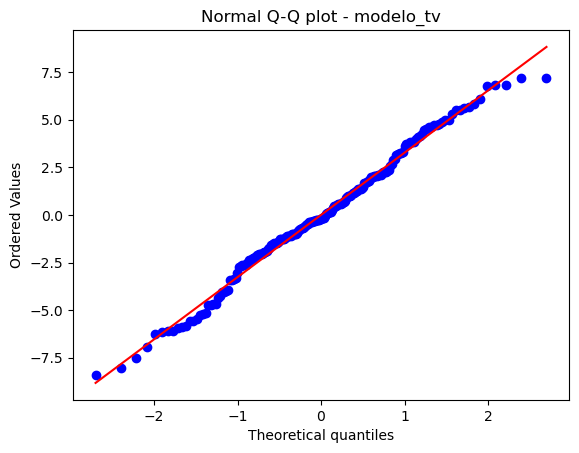

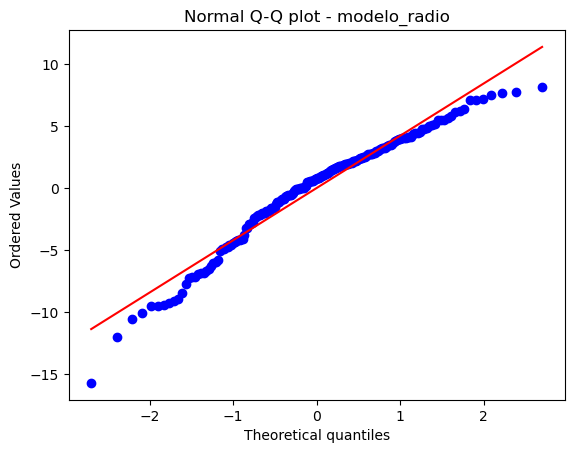

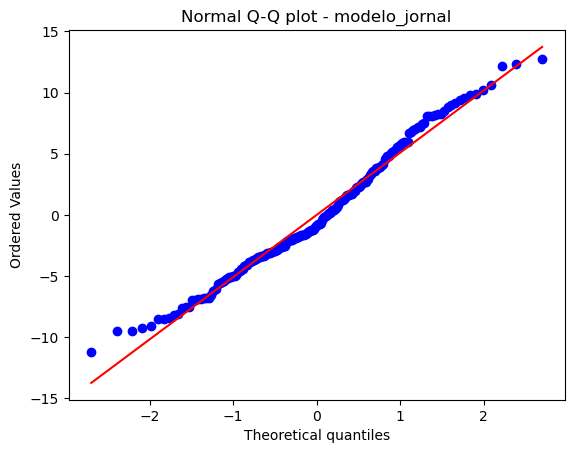

In [61]:
 for nome, modelo, dados in modelos:
    stats.probplot(modelo.resid,dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot - {nome}")
    plt.show()

Aparentemente todos se aproximam da reta e parecem ser normais.

#### liliefors:

In [67]:
for nome, modelo, dados in modelos:   
    estatistica_lili, p_lili= sm.stats.diagnostic.lilliefors(modelo.resid,dist="norm")
    print(f'Estatísticas de teste {nome}: {format(estatistica_lili)}')
    print('p-valor: {}'.format(p_lili))

Estatísticas de teste modelo_tv: 0.041533245383829964
p-valor: 0.5533336198562572
Estatísticas de teste modelo_radio: 0.09213256457184082
p-valor: 0.0009999999999998899
Estatísticas de teste modelo_jornal: 0.07968429461496424
p-valor: 0.0037407390626127517


modelo_tv     p-valor > 0.05
modelo_radio  p-valor < 0.05
modelo_jornal p-valor < 0.05

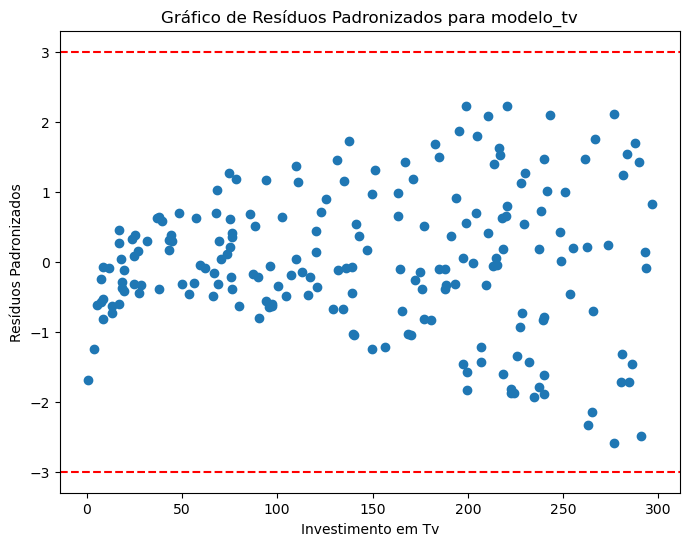

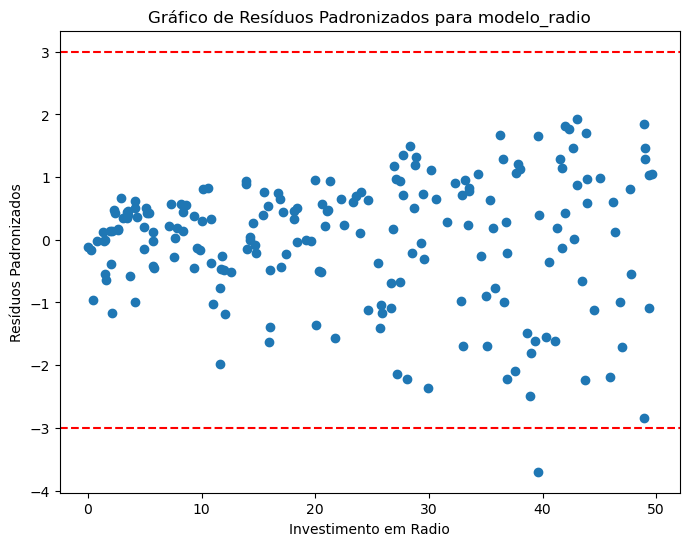

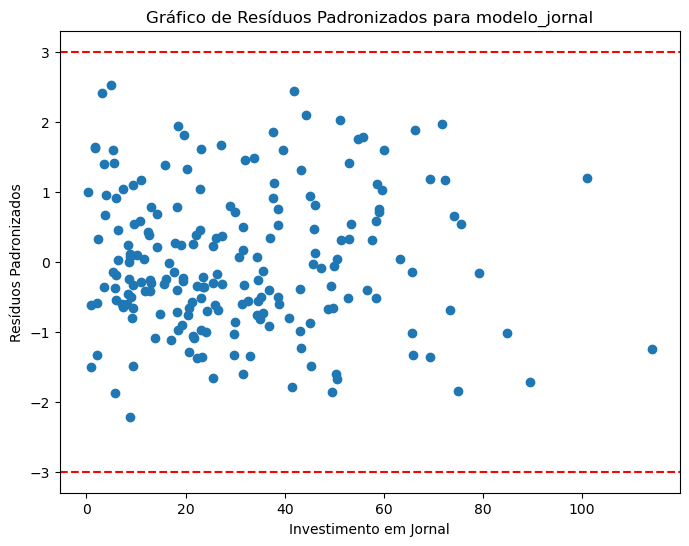

In [64]:
 for nome, modelo, dados in modelos:
    residuos_padronizados = modelo.get_influence().resid_studentized_internal
    
    # Cria um gráfico de resíduos
    plt.figure(figsize=(8, 6))
    plt.scatter(dados, residuos_padronizados)
    plt.axhline(y=3, color='r', linestyle='--')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.title(f'Gráfico de Resíduos Padronizados para {nome}')
    plt.xlabel('Investimento em ' + nome.split("_")[1].capitalize())
    plt.ylabel('Resíduos Padronizados')
    
    # Mostrar o gráfico
    plt.show()

Nenhum dos residuos apresenta um outlier além de 3 e -3

#### Análise geral dos residuos: 
| Modelo  | Breusch-Pagan (Homocedasticidade) | Shapiro-Wilk (Normalidade) | Lilliefors (Normalidade) | QQ-Plot | Outliers |
|---------|----------------------------------|----------------------------|--------------------------|---------|----------|
| TV      | ❌                                | ✅                          | ✅                        | ✅       | ✅        |
| Rádio   | ❌                                | ❌                          | ❌                        | ✅       | ✅        |
| Jornal  | ✅                                | ❌                          | ❌                        | ✅       | ✅        |


### 5 – Análise do Modelo

In [94]:
for nome, modelo, dados in modelos:
    print(str(modelo.summary()))

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        21:38:56   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

| Modelo  | Teste T (Significância dos Coeficientes) | Teste F (Significância Global) | R² Ajustado |
|---------|-----------------------------------------|--------------------------------|-------------|
| TV      | ✅                                        | ✅                              | 0.610       |
| Rádio   | ✅                                        | ✅                              | 0.329       |
| Jornal  | ✅                                        | ✅                              | 0.047       |

#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Nos resultados fornecidos, todos os modelos mostraram coeficientes significativos (p-valor < 0.05 para os coeficientes de TV, Rádio e Jornal).

#### Teste F:
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Todos os modelos (TV, Rádio e Jornal) apresentaram p-valores baixos no Teste F, indicando que são estatisticamente significativos.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo de TV tem um R² Ajustado de 0.610, indicando que cerca de 61% da variabilidade em Vendas é explicada pelo modelo. Os modelos de Rádio e Jornal têm R² Ajustado mais baixos, indicando um ajuste menos eficaz.

# Exercício 2

#### A partir da base de dados propaganda.csv Download propaganda.csv faça um modelo de regressão múltipla para predizer as vendas:

5 – Faça o modelo de regressão

6 – realize a analise de resíduos

7 – Análise de multicolinearidade

8 – Análise do Modelo

In [88]:
dados = pd.read_csv('propaganda.csv')
# Adicionar uma constante ao modelo
X_multi = sm.add_constant(dados[['TV', 'Radio', 'Jornal']])

# Ajustar o modelo de regressão múltipla
modelo_multi = sm.OLS(dados['Vendas'], X_multi).fit()


#### 6 – realize a analise de resíduos

##### Shapiro

In [76]:
estatistica_shapiro,p_shapiro = stats.shapiro(modelo_multi.resid)
print(f'Estatísticas de teste Shapiro: {format(estatistica_shapiro)}')
print('p-valor: {}'.format(p_shapiro))

Estatísticas de teste Shapiro: 0.9905304908752441
p-valor: 0.21331307291984558


##### breuschpagan

In [77]:
estatistica, p, f, fp = het_breuschpagan(modelo_multi.resid, modelo_multi.model.exog)
print(f'Estatísticas de teste para breuschpagan: {format(estatistica)}')
print(f'p-valor: {p}')

Estatísticas de teste para breuschpagan: 48.037965662293615
p-valor: 4.1804559077556965e-12


##### Q-Q plot

Text(0.5, 1.0, 'Normal Q-Q plot - modelo_multi')

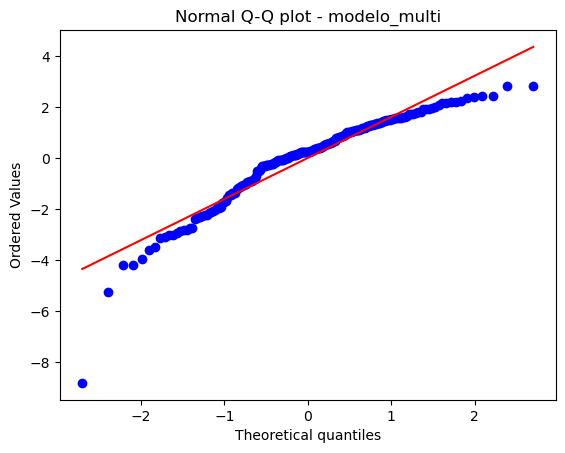

In [93]:
stats.probplot(modelo_multi.resid,dist="norm", plot=plt)
plt.title(f"Normal Q-Q plot - modelo_multi")

#### 7 – Análise de multicolinearidade

In [89]:


# Calcula o VIF para cada variável independente
vif = pd.DataFrame()
vif["Variável"] = X_multi.columns
vif["VIF"] = [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]

print(vif)

  Variável       VIF
0    const  6.848900
1       TV  1.004611
2    Radio  1.144952
3   Jornal  1.145187


Nenhum índice acima de 5. Ok!

#### 8 – Análise do Modelo

In [91]:
print(modelo_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        21:34:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Os coeficientes TV e Radio passaram, no entando o coeficiente jornal têm P-valor 0.86 > 0.05 o que indica que ele não é siginificativo para o modelo e a sua excluisão talvez resulte em um modelo melhor.

#### Teste F:
print(modelo_multi.summary())
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Neste caso, nosso p-valor se aproxima bastante de zero, 1.58e-96, o quê nos diz que nosso modelo é significativo.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo multivalorado tem um R² Ajustado de 0.896, indicando que cerca de 89% da variabilidade em Vendas é explicada pelo modelo.

In [92]:
X_multi2 = sm.add_constant(dados[['TV', 'Radio']])

# Ajustar o modelo de regressão múltipla
modelo_multi2 = sm.OLS(dados['Vendas'], X_multi2).fit()
print(modelo_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           4.83e-98
Time:                        21:35:29   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

Realizando um novo modelo retirando a variávei Jornal, podemos observar claramente que o R² Ajustado não mudou e o nosso Teste F teve desempenho melhor, o quê indica que temos realmente um modelo melhor retirando a variável Jornal, portanto parar de gastar com propaganda em jornais :)